In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

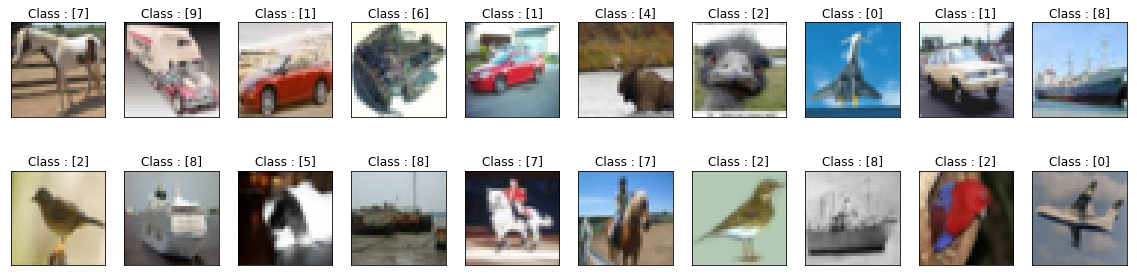

In [7]:
### Visualize some data
fig = plt.figure(figsize = (20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.title('Class : '+ str(Y_train[i]))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

In [8]:
### Define the model and it's layers.
# You can experiment here for better accuracy.

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))


model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(rate = 0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
__________

In [12]:
model.fit(x_train, y_train, epochs = 25, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 164s 3ms/sample - loss: 1.2156 - acc: 0.5620 - val_loss: 1.0398 - val_acc: 0.6310
Epoch 2/25
50000/50000 [==============================] - 172s 3ms/sample - loss: 0.9311 - acc: 0.6707 - val_loss: 0.9190 - val_acc: 0.6775
Epoch 3/25
50000/50000 [==============================] - 173s 3ms/sample - loss: 0.8043 - acc: 0.7164 - val_loss: 0.9196 - val_acc: 0.6776
Epoch 4/25
50000/50000 [==============================] - 176s 4ms/sample - loss: 0.7218 - acc: 0.7454 - val_loss: 0.7289 - val_acc: 0.7411
Epoch 5/25
50000/50000 [==============================] - 170s 3ms/sample - loss: 0.6590 - acc: 0.7683 - val_loss: 0.6020 - val_acc: 0.7870
Epoch 6/25
50000/50000 [==============================] - 178s 4ms/sample - loss: 0.6056 - acc: 0.7880 - val_loss: 0.5001 - val_acc: 0.8239
Epoch 7/25
50000/50000 [==============================] - 181s 4ms/sample - loss: 0.5599 - acc: 0.8037 - val_l

In [14]:
model.fit(x_train, y_train, epochs = 15, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.1695 - acc: 0.9393 - val_loss: 0.3841 - val_acc: 0.8732
Epoch 2/15
50000/50000 [==============================] - 182s 4ms/sample - loss: 0.1577 - acc: 0.9422 - val_loss: 0.2557 - val_acc: 0.9076
Epoch 3/15
50000/50000 [==============================] - 183s 4ms/sample - loss: 0.1422 - acc: 0.9491 - val_loss: 0.1606 - val_acc: 0.9396
Epoch 4/15
50000/50000 [==============================] - 184s 4ms/sample - loss: 0.1472 - acc: 0.9472 - val_loss: 0.2010 - val_acc: 0.9289
Epoch 5/15
50000/50000 [==============================] - 178s 4ms/sample - loss: 0.1276 - acc: 0.9540 - val_loss: 0.1321 - val_acc: 0.9534
Epoch 6/15
50000/50000 [==============================] - 177s 4ms/sample - loss: 0.1303 - acc: 0.9535 - val_loss: 0.1787 - val_acc: 0.9366
Epoch 7/15
50000/50000 [==============================] - 177s 4ms/sample - loss: 0.1222 - acc: 0.9560 - val_l

In [15]:
### Evaluate the model on Test set.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 8s 801us/sample - loss: 1.6605 - acc: 0.7328
Test accuracy: 0.7328


In [16]:
predictions = model.predict(x_test)

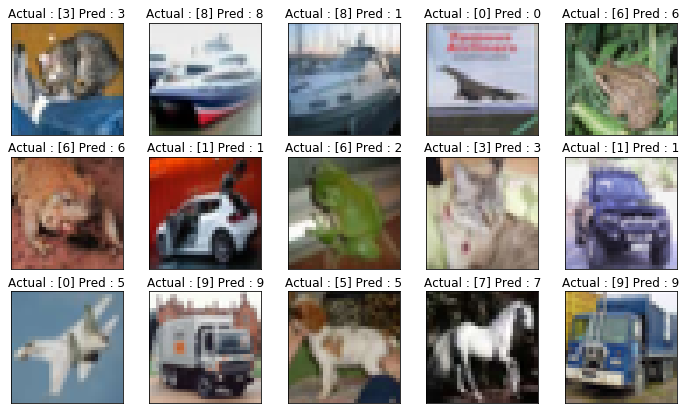

In [17]:
# Plot the predictions

fig = plt.figure(figsize=(12,7))

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.title('Actual : '+str(y_test[i])+' Pred : '+str(np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap = 'gray')

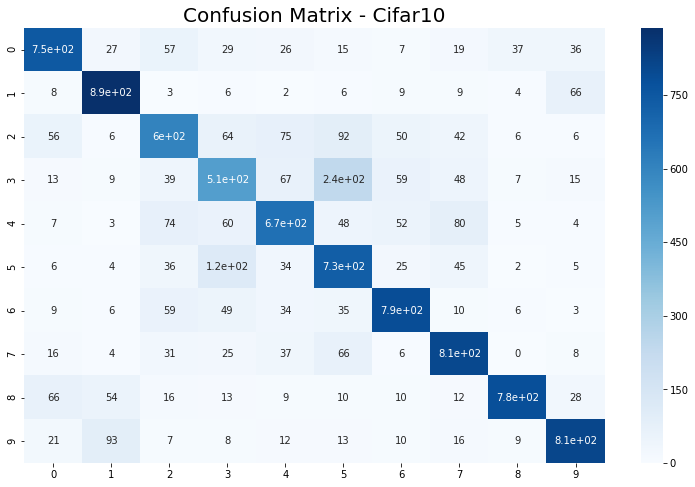

In [18]:
### Generate the Confusion Matrix

y_predictions = np.array([np.argmax(predictions[i]) for i in range(len(predictions))])
matrix = confusion_matrix(y_test, y_predictions)

df_cm = pd.DataFrame(matrix, index = [i for i in '0123456789'], columns = [i for i in "0123456789"])
plt.figure(figsize = (13,8))
plt.title('Confusion Matrix - Cifar10', fontsize = 20)
sns.heatmap(df_cm, annot=True, cmap="Blues")